In [1]:
import os
from os.path import join
import glob
import numpy as np
import matplotlib.pyplot as plt
from pandas import (
    Series,
    DataFrame, 
    set_option
    )
from dataset import Dataset
from params import get_params
set_option("display.max_columns",150)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pierredelice/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
params = get_params()
dataset = Dataset(params)
df = dataset.get_data()
bd = df.copy()

In [24]:
bd = df.copy()

In [21]:
#length of names
bd['name_len'] = [len(elt.split()) for elt in bd['nombre']]
bd['name_len'] = bd['name_len'].astype('int8')

#Calculo de la edad
bd['edad_est'] = round(((bd['fec_def'] - bd['fec_nac']))/ np.timedelta64(1, 'Y'),0)


In [23]:
bd['name_len'].value_counts()

3     5782895
4     2766087
2      134127
5      121571
0      103251
1       18315
6        6236
7         968
8         185
9          28
10         10
11          5
12          2
14          1
Name: name_len, dtype: int64

In [ ]:
bd[bd['name_len']==3]

In [ ]:
bd['nombre'].str.replace(r"^nan$",'',regex=True).value_counts()

In [8]:
df.columns

Index(['nom_c', 'sexo', 'edad_c', 'edad', 'res_ent', 'res_mun', 'res_loc',
       'curp', 'afiliacion', 'edo_civil', 'escolar', 'ocupacion', 'def_ent',
       'def_mun', 'def_loc', 'causa_bas', 'base', 'fec_nac', 'fec_def',
       'miscol', 'nombre', 'name_len', 'edad_est'],
      dtype='object')

In [42]:
df.loc[ [df.edad_est.idxmin(),df.edad_est.idxmax()],
    ['sexo','edad','edad_c','fec_nac', 'fec_def','edad_est']
    ]

,sexo,edad,edad_c,fec_nac,fec_def,edad_est
313,2,5,1,2016-10-29,2016-10-29,0.0
313,1,3,1,2017-05-31,2017-05-31,0.0
313,1,22,1,2022-03-31,2022-03-31,0.0
313,1,999,0,NaT,2011-10-26,NaN
313,1,999,0,NaT,2010-03-14,NaN
313,1,10,1,2021-04-19,2021-04-19,0.0
313,1,999,0,NaT,2020-03-02,NaN
313,2,5,1,2015-07-05,2015-07-05,0.0
313,2,5,1,2014-06-28,2014-06-28,0.0
313,1,999,0,2080-03-18,2018-04-04,-62.0


(array([ 313794.,  195425.,  373708.,  453034.,  701081., 1108941.,
        1511292., 1776085., 1720240.,  720105.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

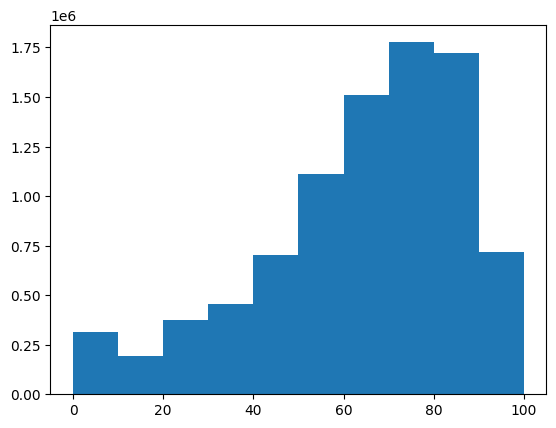

In [10]:
plt.hist(df['edad'], range=(0,100), bins=10)

/var/folders/f7/cfmwg9550852tgnwq3tw36vr0000gn/T/ipykernel_1318/1012542094.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


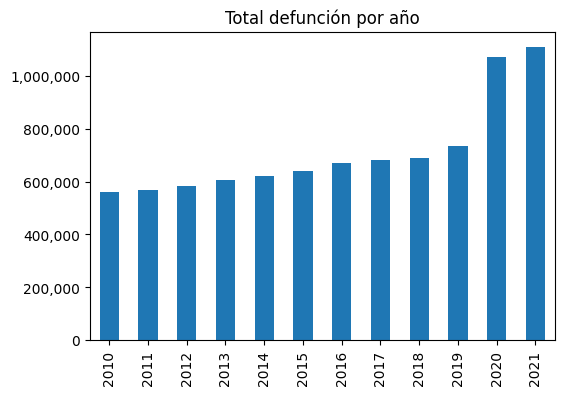

In [25]:
df.loc[df['base']<= 2021]['base'].value_counts().sort_index().plot(kind='bar', figsize=(6,4))
plt.title("Total defunción por año")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

filename = "def_anio.png"
filename = join(
    params["path"]+params["path graphics"],
    filename
)
plt.savefig(filename)
plt.show();